<b>¡Hola Andrés!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto. 

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas. 
    
</div>

<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>

Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor. 
   
</div>

<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
    
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión. 

</div>

<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>

Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
    
</div>

Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos. 

¡Empecemos!

<div class="alert alert-block alert-info">
<b>Comentario general primera iteración</b><a class="tocSkip"></a>

Andrés presentas un buen avance. He dejado algunas indicaciones esperando sean de utilidad. Este es el proyecto más complicado que enfrentarás en tu formación como Analista de Datos y para superarlo, requerirás revisar muy bien cómo se calculan cada una de las métricas en la plataforma. Alternativamente te sugiero contactes un instructor o tutor. Esta primer figura podrá apoyarte con fragmentos de código para que puedas completar tu proyecto. 
    
Quedo atento a cualquier cosa que necesites.
    
</div>

<div class="alert alert-block alert-info">
<b>Comentario general segunda iteración</b><a class="tocSkip"></a>

Andrés gracias por considerar mis comentarios. Respondes a las preguntas señaladas en la descripción del proyecto. No obstante, las métricas aún no están en el orden de lo esperado. 
    
Por considerar que puede ser útil para ti, te estoy compartiendo unos fragmentos de código alternativos para el cálculo del cac y el ROMI. Por favor consideralos y ajusta tu proyecto para que esté listo para tu portafolio. 

Quedo atento. 
    
</div>

<div class="alert alert-block alert-info">
<b>Comentario general tercera iteración</b><a class="tocSkip"></a>

Andrés, las métricas estimadas son correctas. Proyecto aprobado. Ha sido un gusto revisar tu proyecto.
    
</div>

# PROYECTO SPRINT 8

## Descripción del proyecto
Se te ha ido muy bien en el curso TripleTen y te han ofrecido hacer prácticas en el departamento analítico de Y.Afisha. Tu primera tarea es ayudar a optimizar los gastos de marketing.

Lo que tienes:

* registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
* un archivo con los pedidos en este periodo; 
* estadísticas de gastos de marketing.

Lo que vas a investigar:

* cómo los clientes usan el servicio;
* cuándo empiezan a comprar;
* cuánto dinero aporta cada cliente a la compañía;
* cuándo los ingresos cubren el costo de adquisición de los clientes.

### Descripción de los datos

La tabla visits (registros del servidor con datos sobre las visitas al sitio web):
- Uid: identificador único del usuario;
- Device: dispositivo del usuario;
- Start Ts: fecha y hora de inicio de la sesión;
- End Ts: fecha y hora de término de la sesión;
- Source Id: identificador de la fuente de anuncios de la que proviene el usuario.
- Todas las fechas de esta tabla están en formato AAAA-MM-DD.

La tabla orders (datos sobre pedidos):

- Uid: identificador único del usuario que realiza un pedido;
- Buy Ts: fecha y hora del pedido;
- Revenue: ingresos de Y.Afisha de este pedido.

La tabla costs (datos sobre gastos de marketing):

- source_id: identificador de la fuente de anuncios
- dt: fecha;
- costs: gastos en esta fuente de anuncios en este día.


## Instrucciones para completar el proyecto
### Paso 1. Descarga los datos y prepáralos para el análisis

Almacena los datos de visitas, pedidos y gastos en variables.  Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto.

Rutas de archivos: 

- /datasets/visits_log_us.csv. Descarga el dataset
- /datasets/orders_log_us.csv. Descarga el dataset
- /datasets/costs_us.csv. Descarga el dataset





#### Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import timedelta


#### Carga de archivos

In [2]:
df_visits = pd.read_csv('/datasets/visits_log_us.csv')
df_orders = pd.read_csv('/datasets/orders_log_us.csv')
df_costs = pd.read_csv('/datasets/costs_us.csv')

#### Análisis de datos

##### Visits

In [3]:
df_visits.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [4]:
#se transforma en minúsculas todos los nombres
new_colnames = []
for name in df_visits.columns:
    new = name.lower()
    new_colnames.append(new)
df_visits.columns = new_colnames

#renombrar columnas
df_visits = df_visits.rename(columns={'end ts': 'end_ts','source id': 'source_id','start ts': 'start_ts'})

# Optimización de datos
df_visits['device'] = df_visits['device'].astype('category')     
df_visits['end_ts'] =  pd.to_datetime(df_visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')

df_visits.info(memory_usage = 'deep')
print()
print("El número de datos duplicados en df_visits es ",df_visits.duplicated().sum())
print()
print(df_visits.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB

El número de datos duplicados en df_visits es  0

         device              end_ts  source_id            start_ts  \
134320  desktop 2017-11-24 16:41:00          2 2017-11-24 16:05:00   
254443    touch 2018-04-09 17:58:00          4 2018-04-09 17:57:00   
11823   desktop 2017-07-06 13:50:00          3 2017-07-06 13:48:00   
94556   desktop 2017-10-14 18:23:00          5 2017-10-14 18:03:00   
29214     touch 2017-06-06 08:03:00          5 2017-06-06 08:01:00   
1

##### Orders

In [5]:
df_orders.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [6]:
#se transforma en minúsculas todos los nombres
new_colnames = []
for name in df_orders.columns:
    new = name.lower()
    new_colnames.append(new)
df_orders.columns = new_colnames

#renombrar columnas
df_orders = df_orders.rename(columns={'buy ts': 'buy_ts'})

# Optimización de datos  
df_orders['buy_ts'] =  pd.to_datetime(df_orders['buy_ts'], format = '%Y-%m-%d %H:%M:%S')

df_orders.info(memory_usage = 'deep')
print()
print("El número de datos duplicados en df_orders es ",df_orders.duplicated().sum())
print()
print(df_orders.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

El número de datos duplicados en df_orders es  0

                   buy_ts  revenue                   uid
39091 2018-03-08 23:04:00     6.42  17890788026221214471
21110 2017-11-30 13:33:00     2.69   7106972239566807775
2586  2017-07-04 20:54:00     1.28    782263501210163175
22995 2017-12-09 13:21:00     0.12  13991496533592313516
14524 2017-10-25 14:59:00     1.77  18228875864275903988
43962 2018-04-13 13:14:00     6.42  16262121751441932915
40676 2018-03-19 20:39:00     5.50   1318069582627164113
25393 2017-12-22 13:14:00   110.00  10246903932085021612
20486 2017-11-27 16:00:00     4.0

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Muy bien por la práctica de transformar a snake_case el nombre de tus columnas. 
    
</div>


##### Costs

In [7]:
df_costs.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [8]:
# Optimización de datos
df_costs['dt'] =  pd.to_datetime(df_costs['dt'], format = '%Y-%m-%d')

df_costs.info(memory_usage = 'deep')
print()
print("El número de datos duplicados en df_costs es ",df_costs.duplicated().sum())
print()
print(df_costs.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB

El número de datos duplicados en df_costs es  0

      source_id         dt   costs
1523          5 2017-08-11   85.24
1179          4 2017-08-30  316.81
1529          5 2017-08-17   65.24
2239         10 2017-07-31   12.10
824           3 2017-09-07  410.80
1251          4 2017-11-10  224.96
1212          4 2017-10-02  129.08
1381          4 2018-03-20  294.67
380           2 2017-06-18   49.47
1704          5 2018-02-08  265.77


Este análisis de datos de los 3 archivos ha consistido en:
- Renombrar nombres de columnas
- Verificar duplicados
- Optimizar datos

### Paso 2. Haz informes y calcula métricas 

Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo. 

#### Visitas
* ¿Cuántas personas lo usan cada día, semana y mes?







In [9]:
df_visits['st_ts_year']  = df_visits['start_ts'].dt.year
df_visits['st_ts_month'] = df_visits['start_ts'].astype('datetime64[M]')
df_visits['st_ts_week']  = df_visits['start_ts'].astype('datetime64[W]')
df_visits['st_ts_date'] = df_visits['start_ts'].dt.date
df_visits['st_ts_date'] =  pd.to_datetime(df_visits['st_ts_date'], format = '%Y-%m-%d')

print(df_visits.sample(5))

         device              end_ts  source_id            start_ts  \
272899    touch 2018-02-17 15:59:00          3 2018-02-17 15:58:00   
85426   desktop 2018-02-04 22:52:00          5 2018-02-04 22:42:00   
97917     touch 2018-04-18 15:34:00          4 2018-04-18 15:27:00   
262084    touch 2018-01-29 16:06:00          4 2018-01-29 16:06:00   
30125   desktop 2018-03-18 00:10:00          4 2018-03-18 00:08:00   

                         uid  st_ts_year st_ts_month st_ts_week st_ts_date  
272899    737070970614041360        2018  2018-02-01 2018-02-15 2018-02-17  
85426     503731004852778028        2018  2018-02-01 2018-02-01 2018-02-04  
97917    8736008472610754650        2018  2018-04-01 2018-04-12 2018-04-18  
262084  11922862948163899854        2018  2018-01-01 2018-01-25 2018-01-29  
30125    1615834845270306954        2018  2018-03-01 2018-03-15 2018-03-18  


<div class="alert alert-block alert-danger">
<b>COMENTARIO ATENDIDO</b> <a class="tocSkip"></a>

Veamos que es lo que sucede arriba. Al utilizar dt.month y dt.isocalendar().week estamos asignando un número entero que representa el mes del año o bien, la semana del año, a las variables st_ts_month y st_ts_week.
    
¿Cuál es el problema? ¿Que pasa si fechas comprenden dos años distintos (como es el caso que nos ocupa)? Entonces no habrá una secuencia temporal. Por ejemplo. Imaginemos que estamos en la última semana del año X, esta observación será tagueada con el entero 52. Ahora bien, si estamos en la primera semana del año siguiente X+1, nuestra observación será tagueada con el entero 1. Cuando ordenes tus registros por semana, la semana 1 aparecerá antes que la semana 52 sin embargo, en realidad, por pertenecer a años distintos la semana 1 debería ir despues de la 52. ¿Me explico? 
    
Eso tiene implicaciones transcendentes en este proyecto en el cálculo de todas aquellas métricas con una perspectiva temporal como el LTV o el ROMI. 
    
Te recomiendo entonces que utilices .astype('datetime64[M]') y .astype('datetime64[W]') para calcular las variables de mes y semana. 
   
</div>

<div class="alert alert-block alert-info">

Entendido se ha cambiado el código a datetime64 para definir mes y semana correctamente
    
</div>

In [10]:
dau_total = df_visits.groupby('st_ts_date').agg({'uid': 'nunique'}).mean()
wau_total = df_visits.groupby(['st_ts_year', 'st_ts_week']).agg({'uid': 'nunique'}).mean()
mau_total = df_visits.groupby(['st_ts_year', 'st_ts_month']).agg({'uid': 'nunique'}).mean()

print('El número de usuarios activos diarios (DAU) es: ', int(dau_total))
print('El número de usuarios activos semanales (WAU) es: ',int(wau_total))
print('El número de usuarios activos mensuales (MAU) es: ',int(mau_total))


El número de usuarios activos diarios (DAU) es:  907
El número de usuarios activos semanales (WAU) es:  5621
El número de usuarios activos mensuales (MAU) es:  23228


* ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).


             uid
st_ts_date      
2017-06-01   664
2017-06-02   658
2017-06-03   477
2017-06-04   510
2017-06-05   893
...          ...
2018-05-27   672
2018-05-28  1156
2018-05-29  1035
2018-05-30  1410
2018-05-31  2256

[364 rows x 1 columns]


<AxesSubplot:title={'center':'DAU'}, xlabel='fecha', ylabel='número de sesiones'>

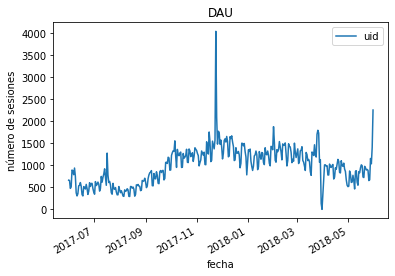

In [11]:
sess_daily = df_visits.groupby('st_ts_date').agg({'uid': 'count'})
print(sess_daily)

sess_daily.plot(xlabel = 'fecha',
               ylabel = 'número de sesiones',
               title = 'DAU')


<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>

Aquí recomiendo hacer gráficos del DAU, WAU y MAU para identificar las tendencias temporale, los picos y los valles de las sesiones.

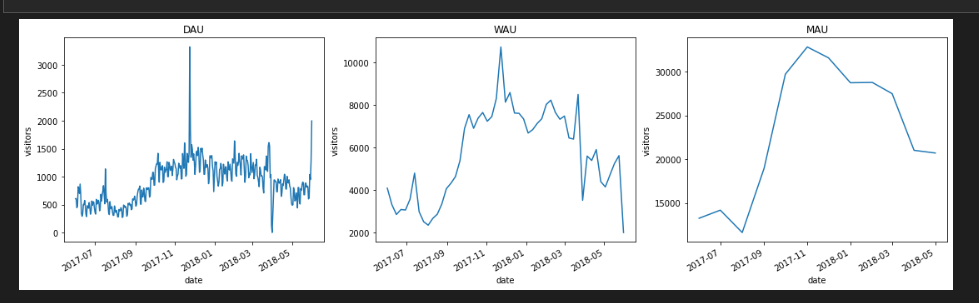

</div>

In [12]:
sess_daily['uid'].describe()

count     364.000000
mean      987.362637
std       418.994796
min         1.000000
25%       635.500000
50%      1003.000000
75%      1280.000000
max      4042.000000
Name: uid, dtype: float64

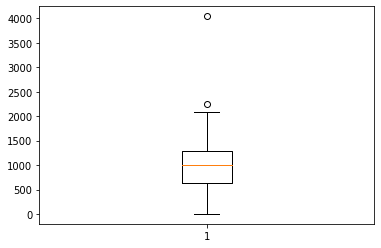

In [13]:
plt.boxplot(sess_daily['uid'])
plt.show()

<AxesSubplot:>

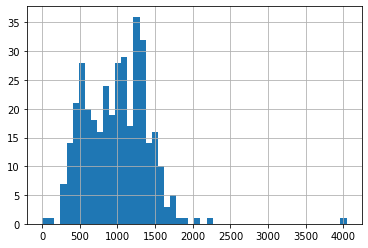

In [14]:
sess_daily['uid'].hist(bins = 50)

Se observa que la media de sesiones al día es 987, aunque existen valores atípicos, el número de las visitas son consistentes 

<AxesSubplot:title={'center':'WAU'}, xlabel='fecha', ylabel='número de sesiones'>

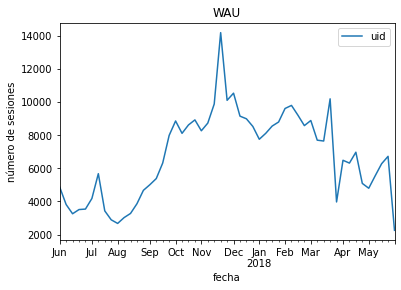

In [15]:
sess_weekly = df_visits.groupby(['st_ts_week']).agg({'uid': 'count'})

sess_weekly.plot(xlabel = 'fecha',
               ylabel = 'número de sesiones',
               title = 'WAU')

<AxesSubplot:title={'center':'MAU'}, xlabel='fecha', ylabel='número de sesiones'>

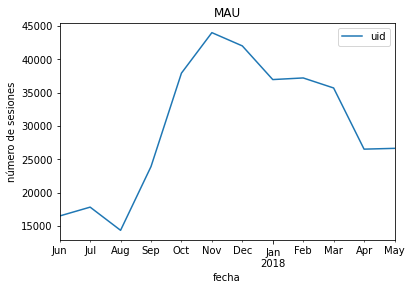

In [16]:
sess_monthly = df_visits.groupby(['st_ts_month']).agg({'uid': 'count'})

sess_monthly.plot(xlabel = 'fecha',
               ylabel = 'número de sesiones',
               title = 'MAU')

La distribución de sesiones al mes, nos muestra que los clientes tienen un comportamiento por temporada, los meses noviembre y diciembre se registra el mayor número de sesiones mientras que en los meses de julio agosto y septiembre las visitas disminuyen.

<div class="alert alert-block alert-info">

Gráficos MAU y WAU realizados
    
</div>

            uid
device         
desktop  262567
touch     96833


<AxesSubplot:title={'center':'Sesiones por device'}, xlabel='fecha', ylabel='device'>

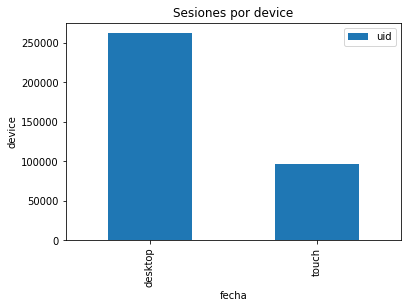

In [17]:
sess_device = df_visits.groupby(['device']).agg({'uid': 'count'})
print(sess_device)

sess_device.plot(kind = 'bar',
                xlabel = 'fecha',
             ylabel = 'device',
             title = 'Sesiones por device')


Este agrupamiento indica que los usuarios que visitan la tienda, lo hacen en su mayoría en computadoras de escritorio.

* ¿Cuál es la duración de cada sesión?



count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration_sess_sec, dtype: float64



La moda de la duración de la sesión es  60 segundos


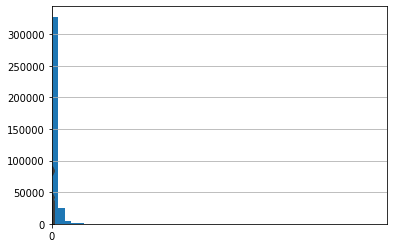

In [18]:
df_visits['duration_sess_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds
print()
print(df_visits['duration_sess_sec'].describe())
print()
sns.boxplot(data = df_visits['duration_sess_sec'])
print()
df_visits['duration_sess_sec'].hist(bins=50)
print()
print('La moda de la duración de la sesión es ', df_visits['duration_sess_sec'].mode()[0], 'segundos')

<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>

Arriba puedes hacer uso de .mode()[0] para que no te aparezca el 0 en la impresión de la moda. 

</div>

<div class="alert alert-block alert-info">

Hecho
    
</div>

Las estadísticas muestran que la mayoría de los usuarios apenas navegan 1 minuto en la página

* ¿Con qué frecuencia los usuarios y las usuarias regresan?

<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>

Para responder esta pregunta, te animo a calcular la tasa de retención.

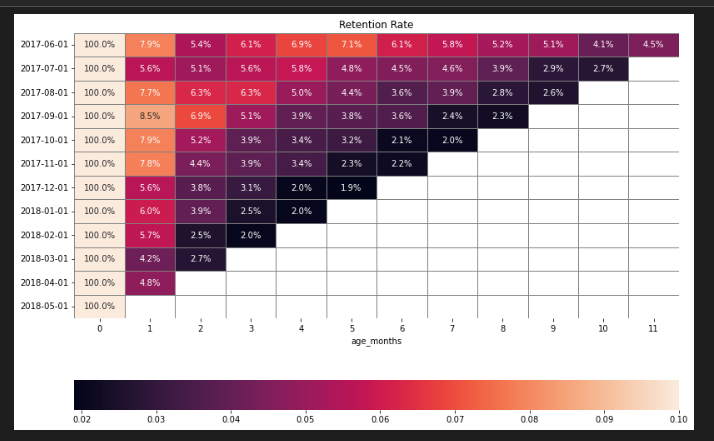


</div>

In [19]:
first_visit_dates = df_visits.groupby('uid')['st_ts_date'].min()
first_visit_dates.name = 'first_visit_date'
print(first_visit_dates)

uid
11863502262781         2018-03-01
49537067089222         2018-02-06
297729379853735        2017-06-07
313578113262317        2017-09-18
325320750514679        2017-09-30
                          ...    
18446403737806311543   2017-11-30
18446424184725333426   2017-12-06
18446556406699109058   2018-01-01
18446621818809592527   2017-12-27
18446676030785672386   2017-10-04
Name: first_visit_date, Length: 228169, dtype: datetime64[ns]


In [20]:
df_visits = df_visits.join(first_visit_dates, on='uid', lsuffix='_left', rsuffix='_right')
df_visits['first_visit_month'] = df_visits['first_visit_date'].astype('datetime64[M]')
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   device             359400 non-null  category      
 1   end_ts             359400 non-null  datetime64[ns]
 2   source_id          359400 non-null  int64         
 3   start_ts           359400 non-null  datetime64[ns]
 4   uid                359400 non-null  uint64        
 5   st_ts_year         359400 non-null  int64         
 6   st_ts_month        359400 non-null  datetime64[ns]
 7   st_ts_week         359400 non-null  datetime64[ns]
 8   st_ts_date         359400 non-null  datetime64[ns]
 9   duration_sess_sec  359400 non-null  int64         
 10  first_visit_date   359400 non-null  datetime64[ns]
 11  first_visit_month  359400 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](7), int64(3), uint64(1)
memory usage: 30.5 MB


In [21]:
df_visits['lifetime_month'] = (df_visits['st_ts_month']- df_visits['first_visit_month'])
df_visits['lifetime_month'] = df_visits['lifetime_month'] / np.timedelta64(1, 'M')
df_visits['lifetime_month'] = df_visits['lifetime_month'].astype(int)
print(df_visits)


         device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
...         ...                 ...        ...                 ...   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         uid  st_ts_year st_ts_month st_ts_week st_ts_date  \
0       16879256277535980062        2017  2017-12-01 2017-12-14 2017-12-20   
1  

In [22]:
visits_cohorts = df_visits.groupby(['first_visit_month', 'lifetime_month']).agg({'uid': 'nunique'}).reset_index()
print(visits_cohorts)

   first_visit_month  lifetime_month    uid
0         2017-06-01               0  13259
1         2017-06-01               2    713
2         2017-06-01               3    814
3         2017-06-01               4    909
4         2017-06-01               5    947
..               ...             ...    ...
58        2018-03-01               0  20589
59        2018-03-01               1    861
60        2018-03-01               2    557
61        2018-04-01               0  15709
62        2018-05-01               0  15273

[63 rows x 3 columns]


In [23]:
initial_count = visits_cohorts[visits_cohorts['lifetime_month'] == 0][['first_visit_month', 'uid']]
initial_count = initial_count.rename(columns={'uid': 'cohort_visits'})
print(initial_count)

   first_visit_month  cohort_visits
0         2017-06-01          13259
10        2017-07-01          13140
19        2017-08-01          10181
28        2017-09-01          16704
34        2017-10-01          25977
41        2017-11-01          27248
46        2017-12-01          25268
51        2018-01-01          22624
55        2018-02-01          22197
58        2018-03-01          20589
61        2018-04-01          15709
62        2018-05-01          15273


In [24]:
visits_cohorts = visits_cohorts.merge(initial_count, on='first_visit_month')
visits_cohorts['retention'] = visits_cohorts['uid'] / visits_cohorts['cohort_visits']
print(visits_cohorts)

   first_visit_month  lifetime_month    uid  cohort_visits  retention
0         2017-06-01               0  13259          13259   1.000000
1         2017-06-01               2    713          13259   0.053775
2         2017-06-01               3    814          13259   0.061392
3         2017-06-01               4    909          13259   0.068557
4         2017-06-01               5    947          13259   0.071423
..               ...             ...    ...            ...        ...
58        2018-03-01               0  20589          20589   1.000000
59        2018-03-01               1    861          20589   0.041818
60        2018-03-01               2    557          20589   0.027053
61        2018-04-01               0  15709          15709   1.000000
62        2018-05-01               0  15273          15273   1.000000

[63 rows x 5 columns]


In [25]:
retention_pivot = visits_cohorts.pivot_table(
    index='first_visit_month',
    columns='lifetime_month',
    values='retention',
    aggfunc='sum',
)
print(retention_pivot)


lifetime_month      0         1         2         3         4         5   \
first_visit_month                                                          
2017-06-01         1.0       NaN  0.053775  0.061392  0.068557  0.071423   
2017-07-01         1.0  0.056088  0.051294  0.056164  0.058219  0.048174   
2017-08-01         1.0  0.076908  0.062862  0.062764  0.050093  0.044004   
2017-09-01         1.0       NaN  0.102490       NaN  0.039392  0.065673   
2017-10-01         1.0  0.078608  0.052239  0.038958  0.058860  0.021365   
2017-11-01         1.0       NaN  0.044113  0.065069  0.023415  0.021800   
2017-12-01         1.0  0.055802  0.062134  0.020263  0.019036       NaN   
2018-01-01         1.0  0.089816  0.024973  0.020244       NaN       NaN   
2018-02-01         1.0  0.025454  0.020093       NaN       NaN       NaN   
2018-03-01         1.0  0.041818  0.027053       NaN       NaN       NaN   
2018-04-01         1.0       NaN       NaN       NaN       NaN       NaN   
2018-05-01  

<AxesSubplot:title={'center':'Cohortes: retención de usuarios/as'}, xlabel='lifetime_month', ylabel='first_visit_month'>

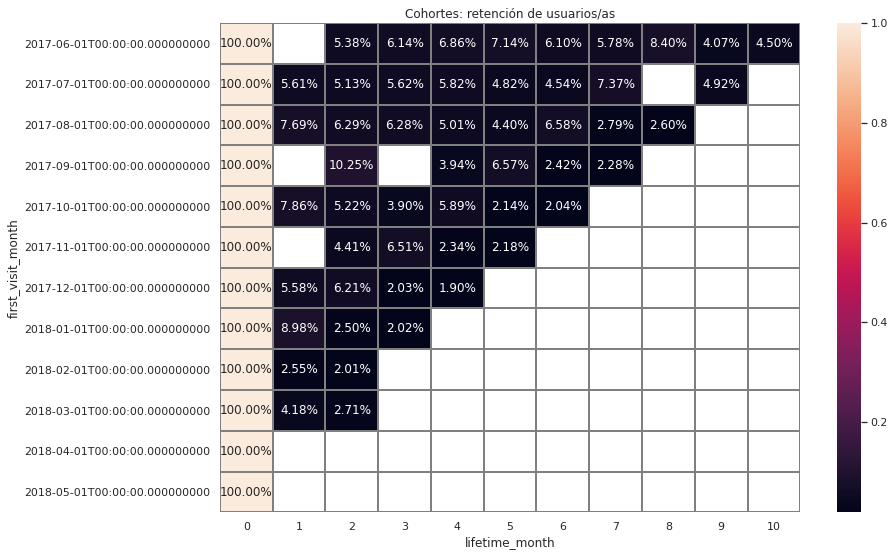

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: retención de usuarios/as')
sns.heatmap(
    retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='gray'
)

#### Ventas
* ¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).



<div class="alert alert-block alert-warning">
<b>Éxito</b> <a class="tocSkip"></a>

¿Cuál sería la respuesta a la pregunta de arriba?
    
</div>


In [27]:
ventas = df_visits.merge(df_orders, on='uid', how = 'outer', suffixes = ['buy_ts','revenue'])
ventas['conv'] = ventas['start_ts'] - ventas['buy_ts']
ventas['conv_days'] = ventas['conv'].dt.days
print(ventas)
ventas.info()


          device              end_ts  source_id            start_ts  \
0          touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1        desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2          touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3        desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4        desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
...          ...                 ...        ...                 ...   
1023808  desktop 2018-04-23 21:19:00         10 2018-04-23 21:11:00   
1023809  desktop 2017-11-08 13:39:00          4 2017-11-08 13:39:00   
1023810  desktop 2017-07-31 12:31:00          3 2017-07-31 12:13:00   
1023811  desktop 2018-03-20 15:25:00          4 2018-03-20 15:11:00   
1023812    touch 2018-04-03 11:23:00          5 2018-04-03 11:19:00   

                          uid  st_ts_year st_ts_month st_ts_week st_ts_date  \
0        16879256277535980062        2017  2017-12-01 2017-12-14 201

In [28]:
cohortes = ventas[(ventas['conv_days'] > 0)]
print(cohortes)

          device              end_ts  source_id            start_ts  \
3        desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
9        desktop 2017-10-27 16:02:00          3 2017-10-27 15:20:00   
15       desktop 2017-10-28 00:04:00          3 2017-10-27 23:56:00   
18       desktop 2017-10-30 11:41:00          3 2017-10-30 11:32:00   
19       desktop 2017-10-30 11:41:00          3 2017-10-30 11:32:00   
...          ...                 ...        ...                 ...   
1016690  desktop 2017-09-16 01:43:00          3 2017-09-16 01:43:00   
1016743    touch 2017-10-25 20:03:00          5 2017-10-25 20:00:00   
1018969  desktop 2018-04-30 00:09:00          5 2018-04-30 00:06:00   
1021382  desktop 2017-11-24 09:40:00          9 2017-11-24 09:32:00   
1022864    touch 2018-01-08 16:12:00          5 2018-01-08 15:45:00   

                          uid  st_ts_year st_ts_month st_ts_week st_ts_date  \
3        16174680259334210214        2018  2018-05-01 2018-05-17 201

* ¿Cuántos pedidos hacen durante un período de tiempo dado?

<AxesSubplot:>

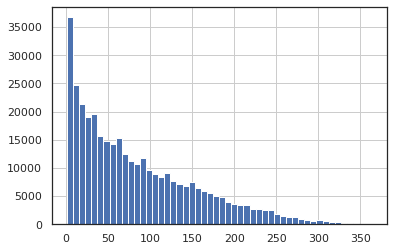

In [29]:
cohortes['conv_days'].hist(bins = 50)

In [30]:
cohortes['conv_days'].describe()

count    356716.000000
mean         84.238257
std          71.875823
min           1.000000
25%          25.000000
50%          65.000000
75%         128.000000
max         363.000000
Name: conv_days, dtype: float64

In [31]:
cohortes['conv_days'].mode()

0    1.0
dtype: float64

* ¿Cuál es el tamaño promedio de compra?

In [32]:
cohortes['revenue'].describe()

count    356716.000000
mean          9.338349
std          40.687285
min           0.000000
25%           1.830000
50%           3.670000
75%           7.470000
max        2633.280000
Name: revenue, dtype: float64

* ¿Cuánto dinero traen? (LTV)

In [33]:
df_orders['buy_month'] = df_orders['buy_ts'].astype('datetime64[M]')
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   buy_ts     50415 non-null  datetime64[ns]
 1   revenue    50415 non-null  float64       
 2   uid        50415 non-null  uint64        
 3   buy_month  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.5 MB


In [34]:
first_buy = df_orders.groupby('uid').agg({'buy_month': 'min'}).reset_index()
first_buy.columns = ['uid', 'first_buy_month']
first_buy.head()

,uid,first_buy_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [35]:
cohort_sizes = first_buy.groupby('first_buy_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_buy_month', 'n_buyers']
cohort_sizes.head()

,first_buy_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [36]:
orders_ = pd.merge(df_orders,first_buy, on='uid')
orders_.sample(10)

,buy_ts,revenue,uid,buy_month,first_buy_month
41579,2018-03-10 19:20:00,2.44,6316683414466318354,2018-03-01,2018-03-01
12183,2017-09-25 11:33:00,5.50,8673890496628921255,2017-09-01,2017-09-01
36362,2018-02-11 10:45:00,14.02,11171561711096037819,2018-02-01,2018-02-01
1693,2018-01-17 10:57:00,3.67,3263486045884611639,2018-01-01,2017-06-01
25249,2017-11-30 18:01:00,1.47,18071177638347111097,2017-11-01,2017-11-01
49104,2018-05-23 21:53:00,4.28,2129638074470120938,2018-05-01,2018-05-01
41546,2018-03-10 15:03:00,0.35,5628834178180693088,2018-03-01,2018-03-01
22611,2017-11-21 17:28:00,2.81,5483861566648894131,2017-11-01,2017-11-01
4322,2017-06-29 19:08:00,20.00,17807549108028407802,2017-06-01,2017-06-01
48161,2018-05-16 11:09:00,2.44,3421908659488934324,2018-05-01,2018-05-01


In [37]:
cohorts = orders_.groupby(['first_buy_month','buy_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head(10)

,first_buy_month,buy_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
5,2017-06-01,2017-11-01,1487.92
6,2017-06-01,2017-12-01,1922.74
7,2017-06-01,2018-01-01,1176.56
8,2017-06-01,2018-02-01,1119.15
9,2017-06-01,2018-03-01,1225.51


In [38]:
report = pd.merge(cohort_sizes, cohorts, on='first_buy_month')
report['age'] = (report['buy_month'] - report['first_buy_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head(10)


,first_buy_month,n_buyers,buy_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4
5,2017-06-01,2023,2017-11-01,1487.92,5
6,2017-06-01,2023,2017-12-01,1922.74,6
7,2017-06-01,2023,2018-01-01,1176.56,7
8,2017-06-01,2023,2018-02-01,1119.15,8
9,2017-06-01,2023,2018-03-01,1225.51,9


In [39]:
report['ltv'] = report['revenue'] / report['n_buyers']

output_ltv = report.pivot_table(
    index='first_buy_month', columns='age', values='ltv', aggfunc='mean'
).cumsum(axis=1).round(2)

output_ltv.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


<AxesSubplot:title={'center':'ltv'}, xlabel='age', ylabel='first_buy_month'>

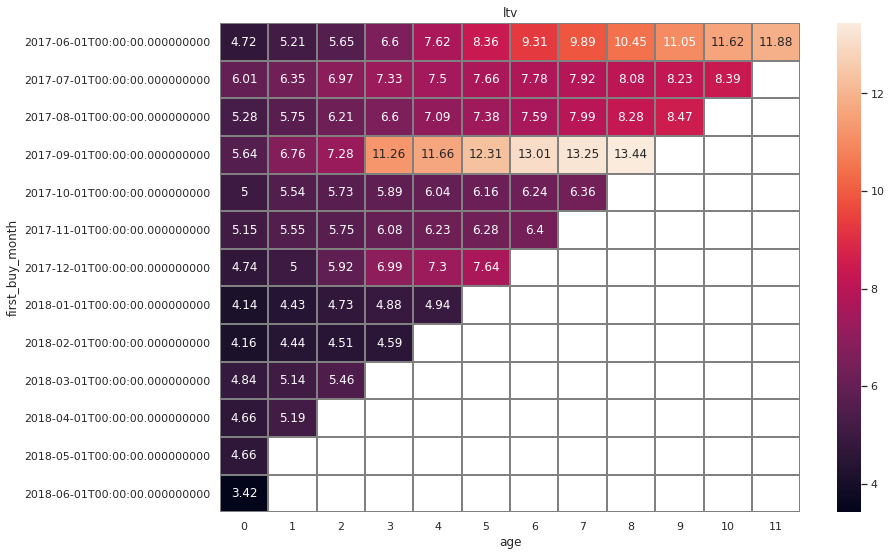

In [40]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ltv')
sns.heatmap(
    output_ltv, annot=True, fmt='g',linewidths=1, linecolor='gray'
)

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Excelente trabajo con el LTV Andrés.
    
</div>

<div class="alert alert-block alert-danger">
<b>COMENTARIO ATENDIDO</b> <a class="tocSkip"></a>

Aquí el LTV debe ser calculado de la siguiente forma. Para obtener estos resultados, recuerda que el LTV es una métrica acumulada y debes añadir .cumsum(axis=1) a tu tabla pivote. Te sugiero además utilizar dos decimales. 

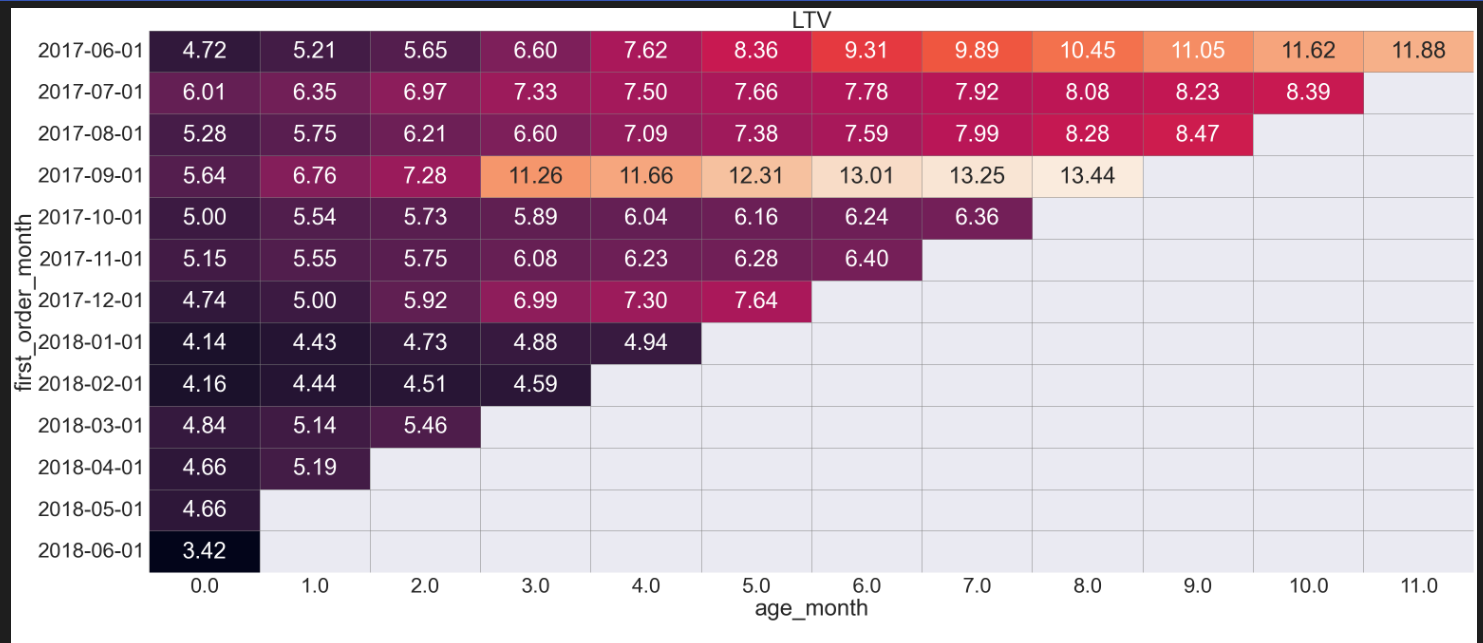
    
</div>

<div class="alert alert-block alert-info">

Gráfico y tabla corregidas
    
</div>

Se observa que existe mayor ingreso por cliente en la primera compra, después los clientes gastan menos

#### Marketing
* ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)


<div class="alert alert-block alert-danger">
<b>Antención</b> <a class="tocSkip"></a>

Aquí esperamos un análisis gráfico de los costos totales, así como su distribución por fuente de adquisición.
    
</div>

In [41]:
df_costs.info()
sources = df_costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
print(sources)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


<AxesSubplot:title={'center':'Costos por fuente'}, xlabel='source_id', ylabel='costs'>

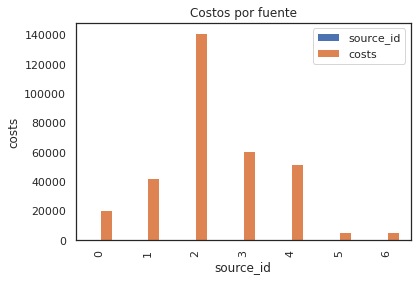

In [42]:
sources.plot(kind = 'bar',
                xlabel = 'source_id',
             ylabel = 'costs',
             title = 'Costos por fuente')

* ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?


<div class="alert alert-block alert-danger">
<b>Antención</b> <a class="tocSkip"></a>

El CAC debe ser calculado por fuente.
    
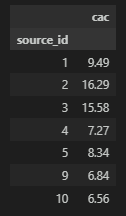
    
</div>

<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>

Andrés te dejo unas lineas de código abajo que tienen por objeto calcular el CAC. Te recomiendo considerarlas para la versión de tu proyecto que cuelgues en tu portafolio.  
</div>

In [43]:
# Cargar datos de visitas desde un archivo CSV
visits = pd.read_csv('/datasets/visits_log_us.csv')

# Convertir las columnas de tiempos de inicio y fin de las visitas al formato de fecha y hora
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format="%Y.%m.%d %H:%M:%S")
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format="%Y.%m.%d %H:%M:%S")

# Renombrar las columnas para mayor claridad
visits = visits.rename(columns={"Device": "device", "End Ts": "session_end_ts", 
                                "Source Id": "source_id", "Start Ts": "session_start_ts", "Uid": "uid"})

# Extraer el mes, la semana y la fecha de inicio de sesión
visits['session_month'] = visits['session_start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['session_start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['session_start_ts'].dt.date

print(visits)



         device      session_end_ts  source_id    session_start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
...         ...                 ...        ...                 ...   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         uid session_month session_week session_date  
0       16879256277535980062    2017-12-01   2017-12-14   2017-12-20  
1         1040603

In [44]:
# Encontrar la primera visita de cada usuario
first_visits = visits.groupby('uid').agg({'session_start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_start_ts']

# Extraer la fecha y el mes de la primera sesión
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_session_start_ts'].astype('datetime64[M]')

print(first_visits)

                         uid first_session_start_ts first_session_dt  \
0             11863502262781    2018-03-01 17:27:00       2018-03-01   
1             49537067089222    2018-02-06 15:55:00       2018-02-06   
2            297729379853735    2017-06-07 18:47:00       2017-06-07   
3            313578113262317    2017-09-18 22:49:00       2017-09-18   
4            325320750514679    2017-09-30 14:29:00       2017-09-30   
...                      ...                    ...              ...   
228164  18446403737806311543    2017-11-30 03:36:00       2017-11-30   
228165  18446424184725333426    2017-12-06 20:32:00       2017-12-06   
228166  18446556406699109058    2018-01-01 16:29:00       2018-01-01   
228167  18446621818809592527    2017-12-27 13:27:00       2017-12-27   
228168  18446676030785672386    2017-10-04 16:01:00       2017-10-04   

       first_session_month  
0               2018-03-01  
1               2018-02-01  
2               2017-06-01  
3               201

In [45]:
# Combinar los datos de las primeras visitas con los datos completos de visitas
visits_full = pd.merge(first_visits, visits, on='uid')

# Calcular la diferencia en meses entre la primera visita y las visitas subsiguientes
visits_full['age_months'] = ((visits_full['session_month'] - visits_full['first_session_month']) / 
                             np.timedelta64(1, 'M')).round().astype('int')

print(visits_full[['uid','age_months']])

                         uid  age_months
0             11863502262781           0
1             49537067089222           0
2            297729379853735           0
3            313578113262317           6
4            313578113262317           0
...                      ...         ...
359395  18446424184725333426           0
359396  18446556406699109058           0
359397  18446621818809592527           5
359398  18446621818809592527           0
359399  18446676030785672386           0

[359400 rows x 2 columns]


In [46]:
# Cargar datos de pedidos desde un archivo CSV
orders = pd.read_csv('/datasets/orders_log_us.csv')
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders = orders.rename(columns={"Buy Ts": "buy_ts", "Revenue": "revenue", "Uid": "uid"})

# Extraer el día y el mes de compra
orders['buy_dt'] = orders['buy_ts'].dt.date
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

print(orders)
print('El ltv medio es', orders['revenue'].sum()/orders['uid'].nunique())

                   buy_ts  revenue                   uid      buy_dt  \
0     2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1     2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2     2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3     2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4     2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   
...                   ...      ...                   ...         ...   
50410 2018-05-31 23:50:00     4.64  12296626599487328624  2018-05-31   
50411 2018-05-31 23:50:00     5.80  11369640365507475976  2018-05-31   
50412 2018-05-31 23:54:00     0.30   1786462140797698849  2018-05-31   
50413 2018-05-31 23:56:00     3.67   3993697860786194247  2018-05-31   
50414 2018-06-01 00:02:00     3.42     83872787173869366  2018-06-01   

      order_month  
0      2017-06-01  
1      2017-06-01  
2      2017-06-01  
3      2017-06-01  
4      2017-06-01  
...           .

In [47]:
# Encontrar la primera compra de cada usuario
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

print(first_orders)

                        uid      first_order_ts first_order_dt  \
0           313578113262317 2018-01-03 21:51:00     2018-01-03   
1          1575281904278712 2017-06-03 10:13:00     2017-06-03   
2          2429014661409475 2017-10-11 18:33:00     2017-10-11   
3          2464366381792757 2018-01-28 15:54:00     2018-01-28   
4          2551852515556206 2017-11-24 10:14:00     2017-11-24   
...                     ...                 ...            ...   
36518  18445147675727495770 2017-11-24 09:03:00     2017-11-24   
36519  18445407535914413204 2017-09-22 23:55:00     2017-09-22   
36520  18445601152732270159 2018-03-26 22:54:00     2018-03-26   
36521  18446156210226471712 2018-02-18 19:34:00     2018-02-18   
36522  18446167067214817906 2017-10-17 10:16:00     2017-10-17   

      first_order_month  
0            2018-01-01  
1            2017-06-01  
2            2017-10-01  
3            2018-01-01  
4            2017-11-01  
...                 ...  
36518        2017-11-01  

In [48]:
# Crear un dataframe con las primeras órdenes y las primeras visitas
buyers = pd.merge(first_visits, first_orders, on='uid')

# Calcular los días hasta la primera compra
buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - buyers['first_session_start_ts']) / 
                                    np.timedelta64(1, 'D')).astype('int')

print(buyers)

                        uid first_session_start_ts first_session_dt  \
0           313578113262317    2017-09-18 22:49:00       2017-09-18   
1          1575281904278712    2017-06-03 10:13:00       2017-06-03   
2          2429014661409475    2017-10-11 17:14:00       2017-10-11   
3          2464366381792757    2018-01-27 20:10:00       2018-01-27   
4          2551852515556206    2017-11-24 10:14:00       2017-11-24   
...                     ...                    ...              ...   
36518  18445147675727495770    2017-08-20 13:30:00       2017-08-20   
36519  18445407535914413204    2017-09-22 23:48:00       2017-09-22   
36520  18445601152732270159    2017-08-07 11:51:00       2017-08-07   
36521  18446156210226471712    2017-11-07 10:01:00       2017-11-07   
36522  18446167067214817906    2017-10-17 10:05:00       2017-10-17   

      first_session_month      first_order_ts first_order_dt  \
0              2017-09-01 2018-01-03 21:51:00     2018-01-03   
1              2017

In [49]:
# Cargar datos de costos desde un archivo CSV
costs = pd.read_csv('/datasets/costs_us.csv')
costs['dt'] = pd.to_datetime(costs['dt'])
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

# Calcular el CAC medio
print("CAC medio es:", round(costs['costs'].sum() / orders['uid'].nunique(), 2))


CAC medio es: 9.01


               costs   uid        cac
2017-06-01  18015.00  2023   8.905091
2017-07-01  18240.59  1923   9.485486
2017-08-01  14790.54  1370  10.796015
2017-09-01  24368.91  2581   9.441654
2017-10-01  36322.88  4340   8.369327
2017-11-01  37907.88  4081   9.288870
2017-12-01  38315.35  4383   8.741809
2018-01-01  33518.52  3373   9.937302
2018-02-01  32723.03  3651   8.962758
2018-03-01  30415.27  3533   8.608907
2018-04-01  22289.38  2276   9.793225
2018-05-01  22224.27  2988   7.437841


<AxesSubplot:title={'center':'CAC promedio por mes'}, xlabel='Mes', ylabel='c.u.'>

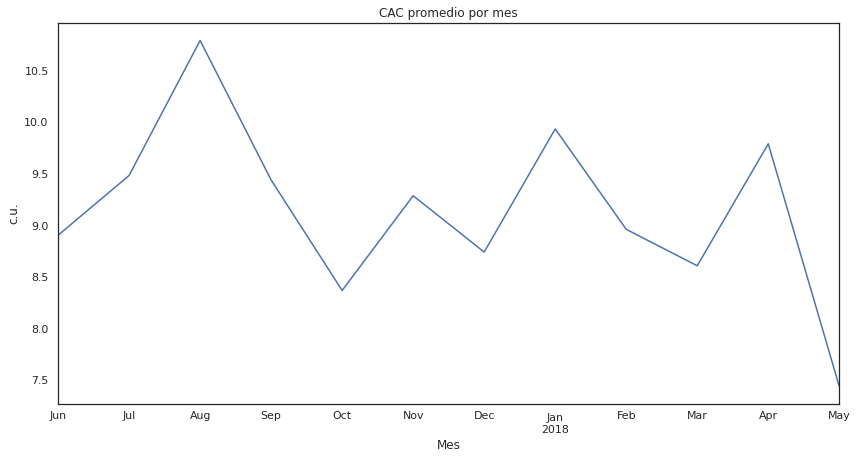

In [50]:
# Calcular el CAC por mes
CAC_by_month = pd.merge(costs.groupby('costs_month').agg({'costs': 'sum'}),
                        buyers.groupby('first_order_month').agg({'uid': 'nunique'}),
                        left_index=True, right_index=True)
CAC_by_month['cac'] = CAC_by_month['costs'] / CAC_by_month['uid']

print(CAC_by_month)
# Gráfico del CAC promedio por mes
CAC_by_month['cac'].plot(figsize=(14, 7), title='CAC promedio por mes', xlabel='Mes', ylabel='c.u.')



In [51]:
# Encontrar la primera fuente por visitante
users = visits_full.sort_values('session_start_ts').groupby('uid').first()
users = users[['source_id']]
buyers = pd.merge(buyers, users, left_on='uid', right_index=True)
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

# Calcular el CAC diario por fuente
costs_ = pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_['cac'] = costs_['costs'] / costs_['n_buyers']

print(costs_)

      source_id first_order_dt  n_buyers         dt  costs costs_month  \
0             1     2017-06-01        14 2017-06-01  75.20  2017-06-01   
1             1     2017-06-02         7 2017-06-02  62.25  2017-06-01   
2             1     2017-06-03         7 2017-06-03  36.53  2017-06-01   
3             1     2017-06-04         3 2017-06-04  55.00  2017-06-01   
4             1     2017-06-05        18 2017-06-05  57.08  2017-06-01   
...         ...            ...       ...        ...    ...         ...   
2428         10     2018-05-27         2 2018-05-27   9.92  2018-05-01   
2429         10     2018-05-28        10 2018-05-28  21.26  2018-05-01   
2430         10     2018-05-29         7 2018-05-29  11.32  2018-05-01   
2431         10     2018-05-30         5 2018-05-30  33.15  2018-05-01   
2432         10     2018-05-31        35 2018-05-31  17.60  2018-05-01   

            cac  
0      5.371429  
1      8.892857  
2      5.218571  
3     18.333333  
4      3.171111  
...

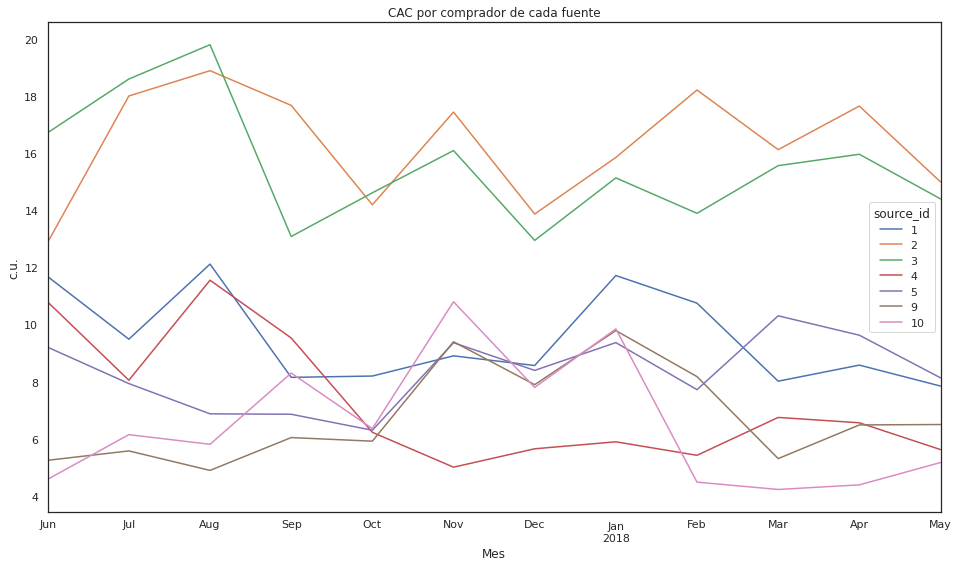

             cac
source_id       
1           9.49
2          16.29
3          15.58
4           7.27
5           8.34
9           6.84
10          6.56


In [52]:
# Gráfico de CAC diario por fuente y mes
costs_.pivot_table(index=['costs_month'], columns='source_id', values='cac', aggfunc='mean').plot(
    figsize=(16, 9), title='CAC por comprador de cada fuente', xlabel='Mes', ylabel='c.u.')
plt.show()

# Calcular el CAC promedio por fuente
cac_by_source = costs_.groupby('source_id').agg({'cac': 'mean'}).round(2)
print(cac_by_source)

<div class="alert alert-block alert-info">

Las fuentes 2 y 3 registran el mayor cac a lo largo del tiempo por lo que probablemente no serán las más rentables al calcular el romi
</div>

* ¿Cuán rentables eran las inversiones? (ROMI)

<div class="alert alert-block alert-danger">
<b>Antención</b> <a class="tocSkip"></a>

Es imprescindible que el ROMI sea calculado por fuente para poder responder el objetivo último de este proyecto que es responder cuáles son las fuentes más y menos rentables.  
    
</div>

<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>

Andrés, también te dejo unas lineas esperando te sean de utilidad para el cálculo del ROMI. Igualmente sugiero incorporarlas a la versión de tu proyecto que publiques en tu portafolio.  
</div>

In [53]:
# Calcular ingresos mensuales por usuario
month_revenue = orders.groupby(['uid', 'order_month']).agg({'revenue': 'sum'}).reset_index()
buyers = buyers.merge(month_revenue, on='uid')

    source_id first_order_month       ltv       cac      romi
0           1        2017-06-01  7.256316  5.924263  1.224847
1           1        2017-06-01  2.184105  5.924263  0.368671
2           1        2017-06-01  2.207526  5.924263  0.372625
3           1        2017-06-01  3.759158  5.924263  0.634536
4           1        2017-06-01  4.269474  5.924263  0.720676
..        ...               ...       ...       ...       ...
73          1        2018-03-01  1.938826  6.736975  0.287789
74          1        2018-03-01  0.788754  6.736975  0.117078
75          1        2018-04-01  4.704581  7.416145  0.634370
76          1        2018-04-01  0.269497  7.416145  0.036339
77          1        2018-05-01  5.220705  6.089668  0.857305

[78 rows x 5 columns]
El romi es:  romi    0.266649
dtype: float64


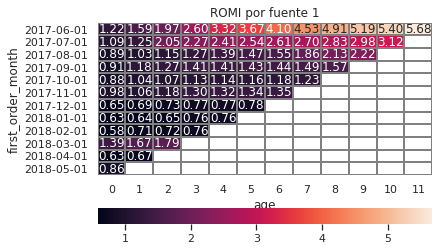

    source_id first_order_month       ltv        cac      romi
0           2        2017-06-01  4.441191  10.329277  0.429962
1           2        2017-06-01  0.491660  10.329277  0.047599
2           2        2017-06-01  0.271915  10.329277  0.026325
3           2        2017-06-01  1.924894  10.329277  0.186353
4           2        2017-06-01  1.666809  10.329277  0.161367
..        ...               ...       ...        ...       ...
73          2        2018-03-01  0.768160  11.700712  0.065651
74          2        2018-03-01  1.243472  11.700712  0.106273
75          2        2018-04-01  5.773000  14.255714  0.404960
76          2        2018-04-01  0.462000  14.255714  0.032408
77          2        2018-05-01  6.845000   6.527767  1.048597

[78 rows x 5 columns]
El romi es:  romi    0.165298
dtype: float64


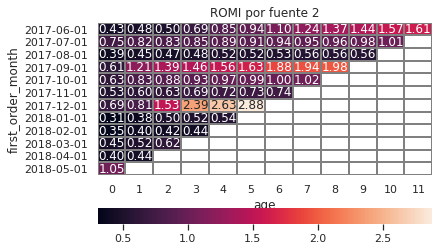

    source_id first_order_month       ltv        cac      romi
0           3        2017-06-01  4.395517  12.118574  0.362709
1           3        2017-06-01  0.112806  12.118574  0.009308
2           3        2017-06-01  0.186411  12.118574  0.015382
3           3        2017-06-01  0.311207  12.118574  0.025680
4           3        2017-06-01  0.185705  12.118574  0.015324
..        ...               ...       ...        ...       ...
73          3        2018-03-01  0.117706  13.640094  0.008629
74          3        2018-03-01  0.345777  13.640094  0.025350
75          3        2018-04-01  4.532876  15.019079  0.301808
76          3        2018-04-01  1.414281  15.019079  0.094166
77          3        2018-05-01  3.858460  11.150972  0.346020

[78 rows x 5 columns]
El romi es:  romi    0.0606
dtype: float64


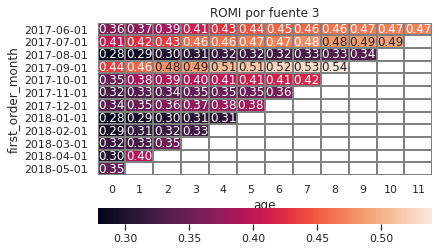

    source_id first_order_month       ltv       cac      romi
0           4        2017-06-01  4.745375  8.510412  0.557596
1           4        2017-06-01  0.040339  8.510412  0.004740
2           4        2017-06-01  0.170872  8.510412  0.020078
3           4        2017-06-01  0.459419  8.510412  0.053983
4           4        2017-06-01  1.148426  8.510412  0.134944
..        ...               ...       ...       ...       ...
73          4        2018-03-01  0.091499  5.515143  0.016590
74          4        2018-03-01  0.089214  5.515143  0.016176
75          4        2018-04-01  5.025116  6.407689  0.784232
76          4        2018-04-01  0.195610  6.407689  0.030527
77          4        2018-05-01  4.729988  5.241555  0.902402

[78 rows x 5 columns]
El romi es:  romi    0.144289
dtype: float64


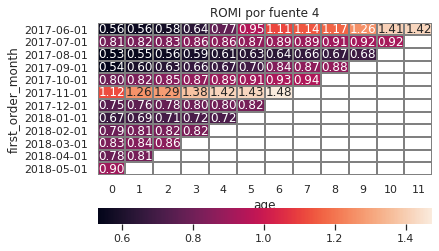

    source_id first_order_month       ltv       cac      romi
0           5        2017-06-01  4.945026  6.812813  0.725842
1           5        2017-06-01  0.902943  6.812813  0.132536
2           5        2017-06-01  0.449297  6.812813  0.065949
3           5        2017-06-01  0.872734  6.812813  0.128102
4           5        2017-06-01  0.663307  6.812813  0.097362
..        ...               ...       ...       ...       ...
73          5        2018-03-01  0.043239  8.578826  0.005040
74          5        2018-03-01  0.051402  8.578826  0.005992
75          5        2018-04-01  4.192047  8.142209  0.514854
76          5        2018-04-01  0.071651  8.142209  0.008800
77          5        2018-05-01  4.213360  7.383421  0.570652

[78 rows x 5 columns]
El romi es:  romi    0.172421
dtype: float64


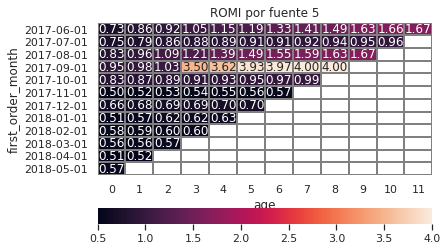

    source_id first_order_month       ltv       cac      romi
0           9        2017-06-01  3.568971  4.194412  0.850887
1           9        2017-06-01  0.071765  4.194412  0.017110
2           9        2017-06-01  0.587941  4.194412  0.140172
3           9        2017-06-01  0.607206  4.194412  0.144765
4           9        2017-06-01  0.267500  4.194412  0.063775
..        ...               ...       ...       ...       ...
71          9        2018-03-01  0.074783  2.983168  0.025068
72          9        2018-03-01  0.078944  2.983168  0.026463
73          9        2018-04-01  5.083721  8.685814  0.585290
74          9        2018-04-01  0.554186  8.685814  0.063804
75          9        2018-05-01  3.717500  6.036167  0.615871

[76 rows x 5 columns]
El romi es:  romi    0.172087
dtype: float64


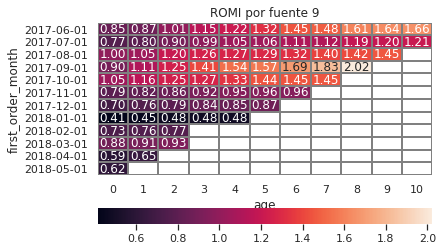

    source_id first_order_month       ltv       cac      romi
0          10        2017-06-01  2.414211  3.307579  0.729903
1          10        2017-06-01  0.116421  3.307579  0.035198
2          10        2017-06-01  0.008947  3.307579  0.002705
3          10        2017-07-01  3.461373  6.467059  0.535231
4          10        2017-07-01  0.031176  6.467059  0.004821
5          10        2017-07-01  0.149608  6.467059  0.023134
6          10        2017-07-01  0.007255  6.467059  0.001122
7          10        2017-08-01  4.997297  6.285676  0.795029
8          10        2017-08-01  0.112162  6.285676  0.017844
9          10        2017-08-01  0.330270  6.285676  0.052543
10         10        2017-08-01  0.123784  6.285676  0.019693
11         10        2017-08-01  0.090811  6.285676  0.014447
12         10        2017-09-01  2.234070  5.356628  0.417066
13         10        2017-09-01  0.064651  5.356628  0.012069
14         10        2017-09-01  0.082326  5.356628  0.015369
15      

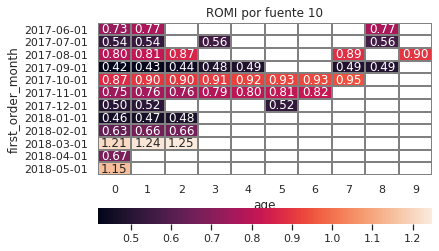

In [54]:
# Iterar a través de cada fuente de tráfico, excepto la fuente número 7
for source, df in buyers.groupby('source_id'):
    if source != 7:
        # Calcular el tamaño de la cohorte para cada fuente y mes de la primera orden
        cohort_sizes_t = (
            df.groupby(['source_id', 'first_order_month'])
            .agg({'uid': 'nunique'})
            .reset_index()
        )
        cohort_sizes_t.columns = ['source_id', 'first_order_month', 'n_buyers']

        # Calcular los ingresos totales por cohorte
        cohorts_revenue_t = (
            df.groupby(['source_id', 'first_order_month', 'order_month'])
            .agg({'revenue': 'sum'})
            .reset_index()
        )
        cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']
        
          # Fusionar los tamaños de las cohortes con los ingresos por cohortes
        report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_order_month'])
        report_romi['age'] = (
            report_romi['order_month'] - report_romi['first_order_month']
        ) / np.timedelta64(1, 'M')
        report_romi['age'] = report_romi['age'].round().astype('int')
        report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']
        
        # Calcular costos y CAC para cada cohorte
        report_romi = pd.merge(report_romi, costs.groupby(['source_id', 'costs_month']).agg({'costs': 'sum'}).reset_index(),
                               left_on=['source_id', 'first_order_month'], right_on=['source_id', 'costs_month'])
        report_romi = report_romi.drop(['costs_month'], axis=1)
        report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
        report_romi['romi'] = report_romi['ltv'] / report_romi['cac']
        
        print(report_romi[['source_id','first_order_month','ltv','cac','romi']])
        print('El romi es: ',report_romi[['romi']].mean())

        # Crear una tabla pivote de ROMI por edad para cada cohorte
        romi = report_romi\
                .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
                .cumsum(axis=1)
        romi.round(2).fillna('')
        
        # Configurar el índice como cadena para un mejor formato
        romi.index = romi.index.astype(str)

        # Visualizar el ROMI utilizando un mapa de calor
        sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws={'orientation': 'horizontal'}
                    ).set(title='ROMI por fuente {}'.format(source))
        plt.show()

<div class="alert alert-block alert-info">

Las fuentes más rentables son la 1 en la cohorte 2017-06 y la fuente 5 en la cohorte 2017-09, las cuales tienen los valores más altos de romi
</div>

### Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

¿Qué fuentes/plataformas recomendarías?  
Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? 
¿Qué conclusiones sacaste después de encontrar los valores métricos?





<div class="alert alert-block alert-info">

* Se recomienda optimizar el diseño de la web para que sea más amigable con tablets y celulares, para que los usuarios puedan navegar más fácilmente
* Los usuarios que compran la primera vez pero compran menos en sus compras posteriores
* Los porcentajes de retención son bajos en todos los cohortes
* Las fuentes más rentables son la 1 y 5, en las cohortes 2017-06 y 2017-09 ya que el romi registra valores más altos
* Las fuentes menos rentables son la 2 y 3, con romi promedios más bajos de 0.16 y 0.06, ya que tienen cac más altos
* La estrategia debe ser enfocada en las fuentes 1 y 5, realizando un análisis del tipo de cliente que compró en ese periodo de tiempo, así también como el tipo de producto adquirido y la época para la compra (tal vez existe un día festivo o similar que aliente a comprar ese mes)
* Los datos muestran que el romi global en este periodo de datos es 0.77 (cac medio = 9.01 y ltv medio = 6.90), calculo respaldado por los romi calculados por cohorte a lo largo de los 12 meses los cuales la mayoria son menores a 1.

Se concluye que la tienda necesita aún más compras períodicas para que el cac pueda bajar a lo largo del tiempo y aumente el ltv, los clientes probablemente compran la primera vez pero el diseño web es deficiente por lo que no se animan a hacer compras posteriores.

La mayoría de cohortes a lo largo del tiempo han registrado romi más bajos que 1 por lo que se asume que los ingresos no son suficientes para cubrir los costos.
    
</div>

<div class="alert alert-block alert-danger">
<b>Antención</b> <a class="tocSkip"></a>

Se espera que los estudiantes conluyan cual es la fuente más y menos rentable con base en el ROMI.

</div>